## `Columns description`
longitude: The geographical longitude of the housing block, represented in degrees. It is a measure of how far east or west the housing block is from the prime meridian.

latitude: The geographical latitude of the housing block, represented in degrees. It indicates how far north or south the housing block is from the equator.

housing_median_age: The median age of the houses in the block. This provides an estimate of the average age of the homes in that area.

total_rooms: The total number of rooms in all housing units within a block. This includes all types of rooms (bedrooms, living rooms, kitchens, etc.).

total_bedrooms: The total number of bedrooms in all housing units within a block. This is a subset of the total rooms count and focuses specifically on bedrooms.

population: The total number of people residing within a block. This gives an idea of the density and size of the population in the area.

households: The total number of households in a block. A household is typically defined as a group of people living together in the same dwelling unit.

median_income: The median income of households in the block, expressed in tens of thousands of dollars. This provides a measure of the economic status of the area.

median_house_value: The median house value in the block, typically expressed in dollars. It indicates the typical market value of homes in that area.

ocean_proximity: The categorical distance of the housing block from the ocean, indicating how close the housing block is to the coast. This could include categories like "near ocean," "inland," "near bay," etc.

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [192]:
df=pd.read_csv('/content/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,NEAR BAY
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,NEAR BAY
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,NEAR BAY
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,NEAR BAY
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,NEAR BAY


In [193]:
df.shape

(20640, 10)

In [194]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


In [195]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [196]:
df.describe(include='O')

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


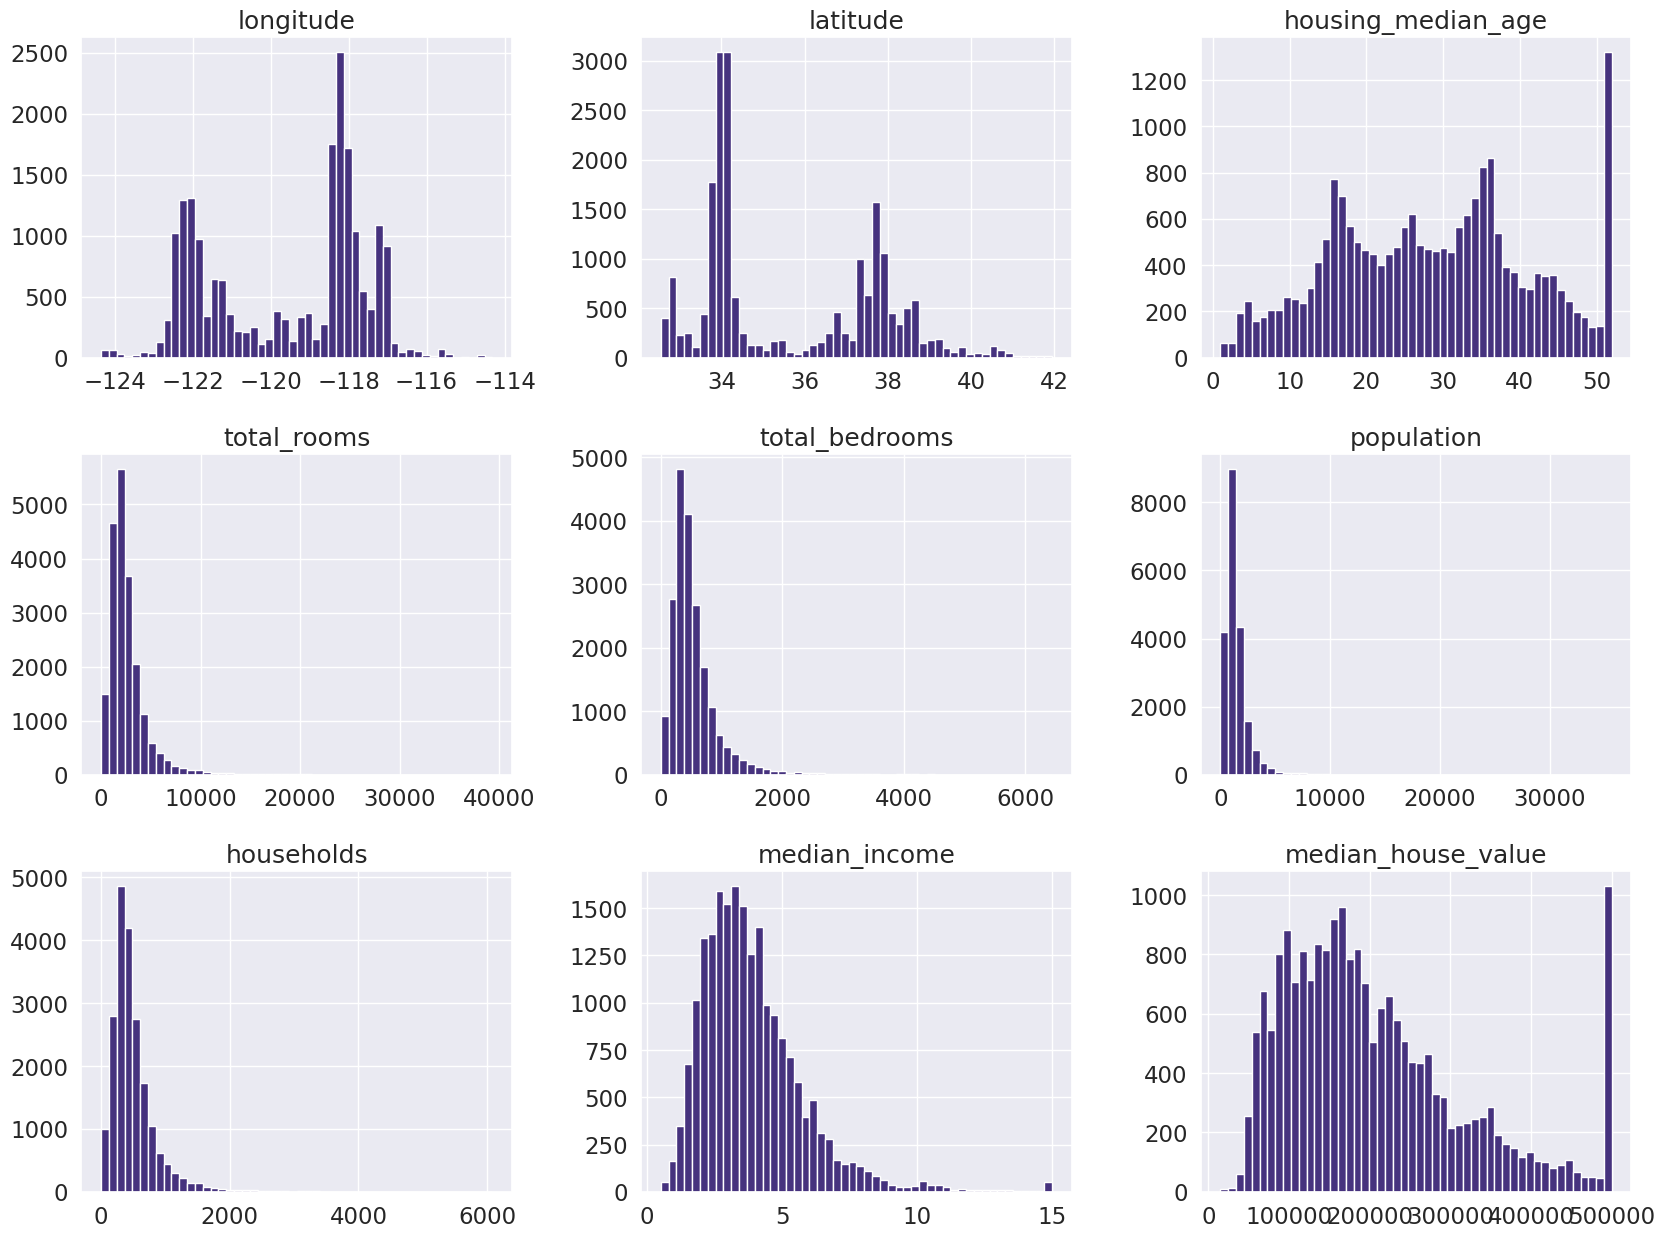

In [197]:
df.hist(bins=50,figsize=(20,15))
plt.show()

## ` Data cleaning and adding additional features`

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [199]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [200]:
df.dropna(inplace=True)

In [201]:
df.duplicated().sum()

0

In [202]:
df['Rooms_per_households']=np.round(df['total_rooms']/df['households'],2)

In [203]:
df['Rooms_per_households'].nlargest(10)

,Rooms_per_households
1914,141.91
1979,132.53
12447,62.42
1913,61.81
11862,59.88
1912,56.27
9676,52.85
11707,52.69
2395,50.84
1240,47.52


In [204]:
df['Rooms_per_households'].nsmallest(10)

,Rooms_per_households
5916,0.85
8219,0.89
3126,1.00
14818,1.13
17820,1.13
4552,1.26
4550,1.38
4587,1.41
4602,1.47
9319,1.55


In [205]:
df.loc[[1979,1914,5916,8219]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Rooms_per_households
1979,-120.08,38.80,34.00,1988.00,511.00,36.00,15.00,4.62,162500.00,INLAND,132.53
1914,-120.10,38.91,33.00,1561.00,282.00,30.00,11.00,1.88,500001.00,INLAND,141.91
5916,-118.44,34.28,46.00,11.00,11.00,24.00,13.00,2.88,162500.00,<1H OCEAN,0.85
8219,-118.21,33.79,33.00,32.00,18.00,96.00,36.00,4.59,112500.00,NEAR OCEAN,0.89


In [206]:
df['population_per_households']=np.round(df['population']/df['households'])

In [207]:
df['bedrooms_per_households']=np.round(df['total_bedrooms']/df['households'])

In [208]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Rooms_per_households,population_per_households,bedrooms_per_households
count,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00
mean,-119.57,35.63,28.63,2636.50,537.87,1424.95,499.43,3.87,206864.41,5.43,3.08,1.05
std,2.00,2.14,12.59,2185.27,421.39,1133.21,382.30,1.90,115435.67,2.48,10.44,0.48
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00,0.85,1.00,0.00
25%,-121.80,33.93,18.00,1450.00,296.00,787.00,280.00,2.56,119500.00,4.44,2.00,1.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.54,179700.00,5.23,3.00,1.00
75%,-118.01,37.72,37.00,3143.00,647.00,1722.00,604.00,4.74,264700.00,6.05,3.00,1.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00,141.91,1243.00,34.00


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   longitude                  20433 non-null  float64
 1   latitude                   20433 non-null  float64
 2   housing_median_age         20433 non-null  float64
 3   total_rooms                20433 non-null  float64
 4   total_bedrooms             20433 non-null  float64
 5   population                 20433 non-null  float64
 6   households                 20433 non-null  float64
 7   median_income              20433 non-null  float64
 8   median_house_value         20433 non-null  float64
 9   ocean_proximity            20433 non-null  object 
 10  Rooms_per_households       20433 non-null  float64
 11  population_per_households  20433 non-null  float64
 12  bedrooms_per_households    20433 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.7+ MB


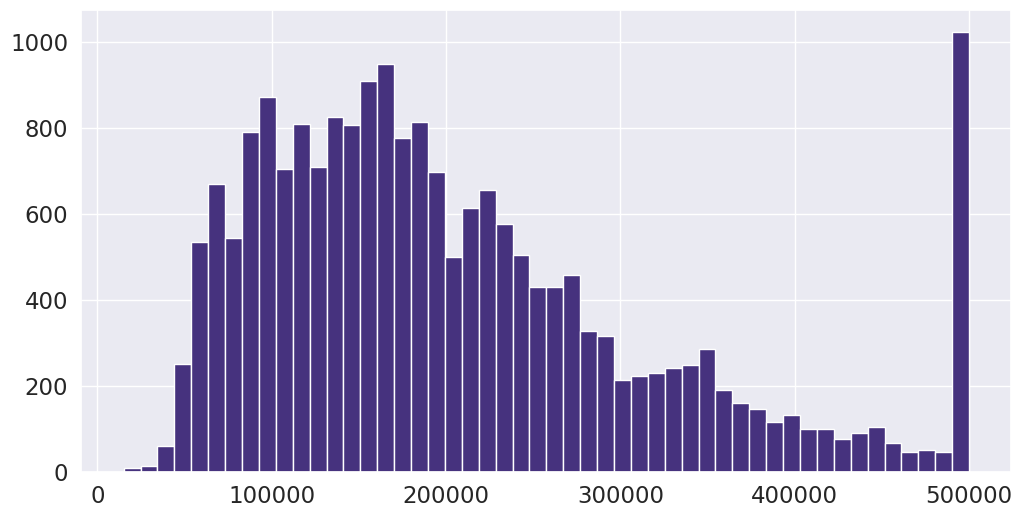

In [210]:
df['median_house_value'].hist(bins=50,figsize=(12,6))
plt.show()

In [211]:
temp_df=df.select_dtypes('number')

In [212]:
temp_df.corr()['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.00
median_income,0.69
Rooms_per_households,0.15
total_rooms,0.13
housing_median_age,0.11
households,0.06
total_bedrooms,0.05
population_per_households,-0.02
population,-0.03
bedrooms_per_households,-0.04


`conclusion of above corr-- The median_house_value is most positively correlated with median_income (0.688), suggesting that higher incomes are associated with higher house values, while it has a weak negative correlation with latitude (-0.145), indicating that house values slightly decrease as you move further north.`

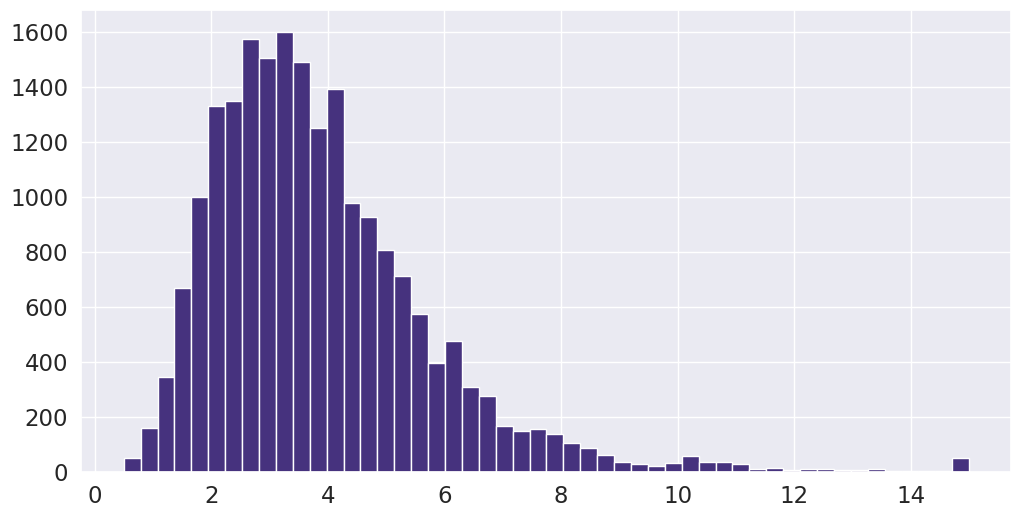

In [213]:
df['median_income'].hist(bins=50,figsize=(12,6))
plt.show()

<Figure size 1200x600 with 0 Axes>

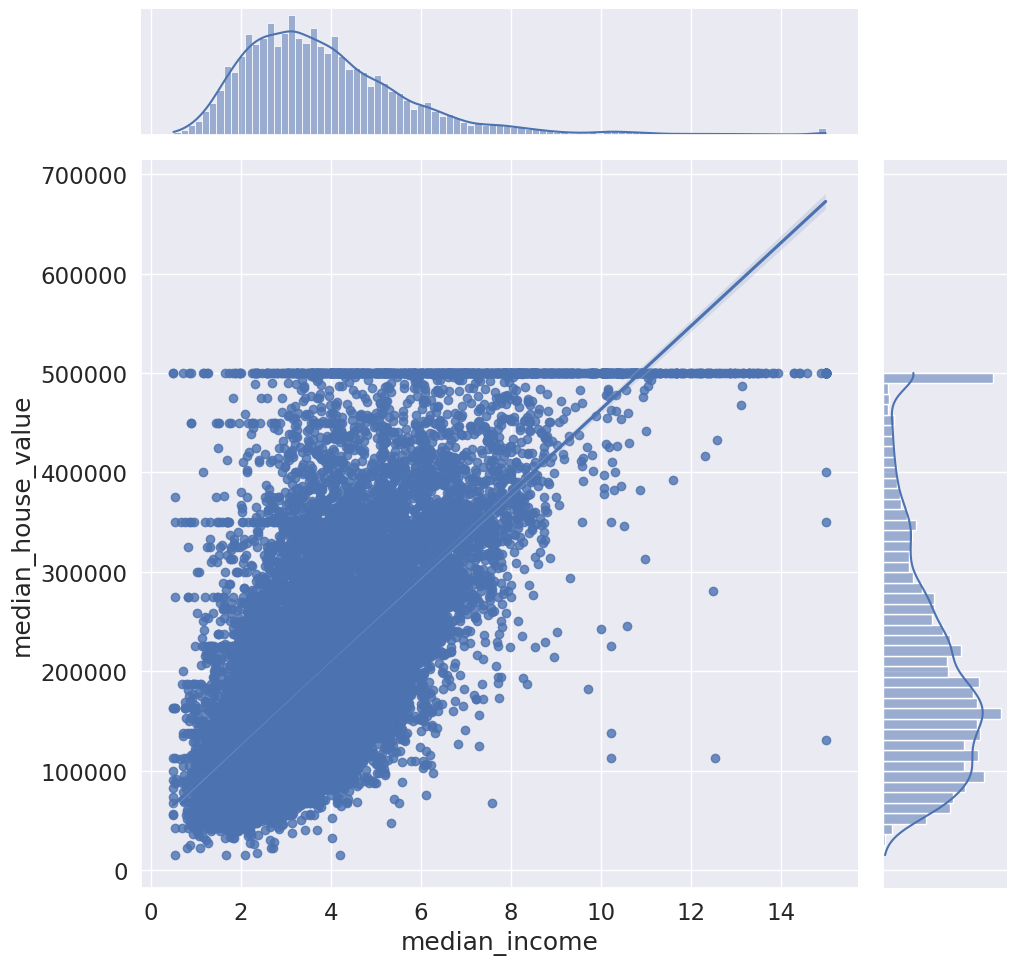

In [214]:
plt.figure(figsize=(12,6),dpi=100)
sns.set(font_scale=1.5)
sns.jointplot(df,x='median_income',y='median_house_value',kind='reg',height=10)
plt.show()

<Figure size 1200x600 with 0 Axes>

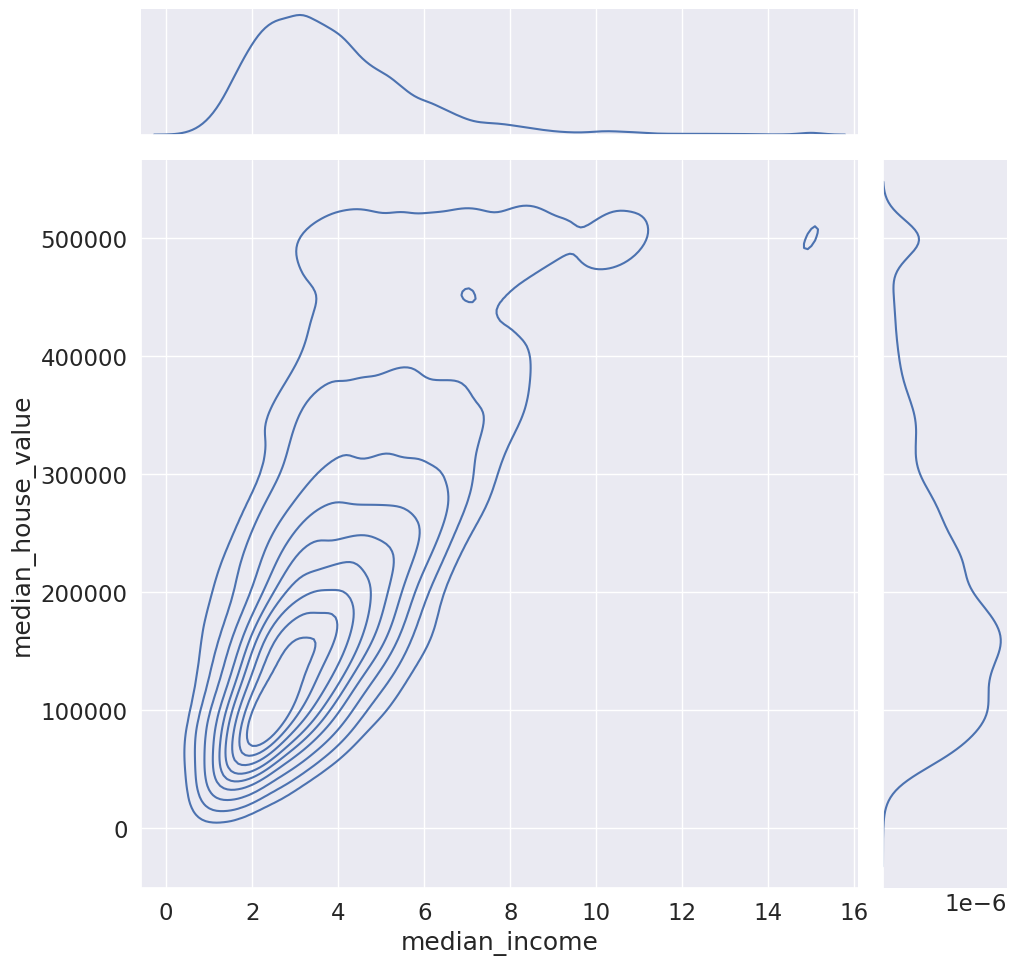

In [215]:
plt.figure(figsize=(12,6),dpi=100)
sns.set(font_scale=1.5)
sns.jointplot(df,x='median_income',y='median_house_value',kind='kde',height=10)
plt.show()

``Conclusion of joint plot``---
1. `The joint plot shows a strong positive relationship between median_income and median_house_value, with a clear upward trend. This suggests that as the median income increases, the median house value also tends to increase. However, there are some data points where median_house_value is capped at around 500,000, indicating a possible data capping or upper limit in the dataset.`

2. `There's a high concentration of data points in the lower-left region, suggesting many houses have lower median values.`

In [216]:
# pip install -U kaleido

In [217]:
fig=px.scatter(df,x='longitude',y='latitude',size='population',color='median_house_value',color_continuous_scale='blackbody' ,title='Scatter Plot of Locations with Population and House Values')
fig.show()

In [218]:
california_ing

array([[[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ]],

       [[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ]],

       [[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.666666

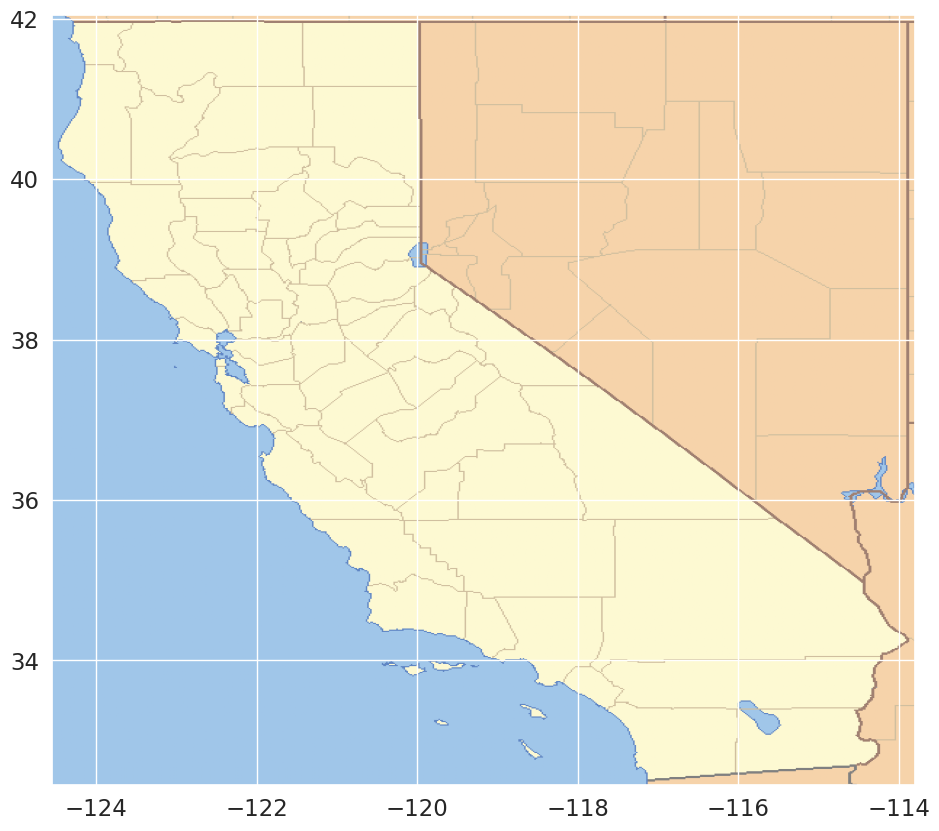

In [219]:
import matplotlib.image as mping
california_ing=mping.imread("/content/california.png")
plt.figure(figsize = (15, 10))
plt.imshow(california_ing, extent=[-124.55, -113.80, 32.45, 42.05])
plt.show()

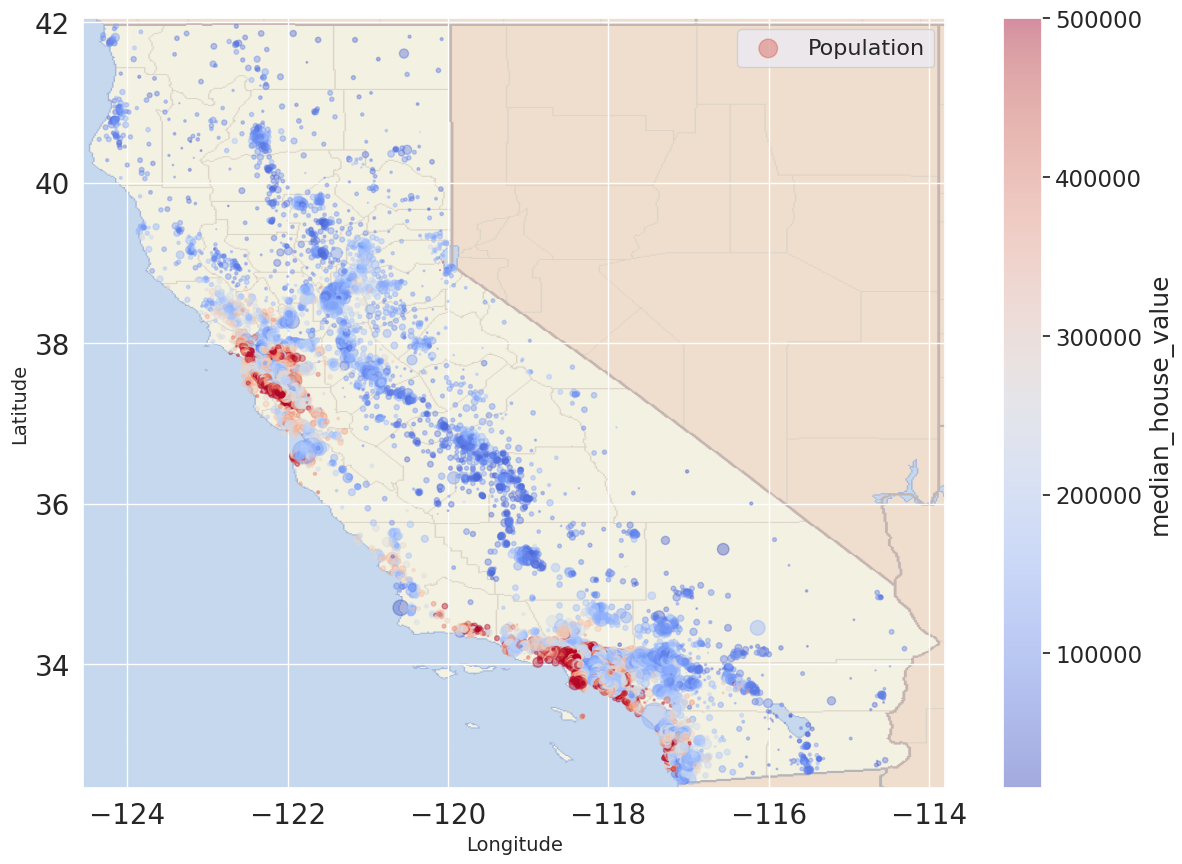

In [220]:
df.plot(kind="scatter", x="longitude", y="latitude",
                       s=df['population']/100, label="Population", figsize = (15, 10),
                       c="median_house_value", cmap="coolwarm",
                       colorbar=True, alpha=0.4, fontsize = 20, sharex = False
                      )
plt.imshow(california_ing, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

In [221]:
prox=df['ocean_proximity'].unique()
prox

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [222]:
df_loc=df[df['ocean_proximity']==prox[2]]
df_loc

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Rooms_per_households,population_per_households,bedrooms_per_households
954,-121.92,37.64,46.00,1280.00,209.00,512.00,208.00,5.14,315600.00,INLAND,6.15,2.00,1.00
957,-121.90,37.66,18.00,7397.00,1137.00,3126.00,1115.00,6.50,323000.00,INLAND,6.63,3.00,1.00
965,-121.88,37.68,23.00,2234.00,270.00,854.00,286.00,7.33,337200.00,INLAND,7.81,3.00,1.00
967,-121.88,37.67,16.00,4070.00,624.00,1543.00,577.00,6.52,311500.00,INLAND,7.05,3.00,1.00
968,-121.88,37.67,25.00,2244.00,301.00,937.00,324.00,6.45,296900.00,INLAND,6.93,3.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.00,1665.00,374.00,845.00,330.00,1.56,78100.00,INLAND,5.05,3.00,1.00
20636,-121.21,39.49,18.00,697.00,150.00,356.00,114.00,2.56,77100.00,INLAND,6.11,3.00,1.00
20637,-121.22,39.43,17.00,2254.00,485.00,1007.00,433.00,1.70,92300.00,INLAND,5.21,2.00,1.00
20638,-121.32,39.43,18.00,1860.00,409.00,741.00,349.00,1.87,84700.00,INLAND,5.33,2.00,1.00


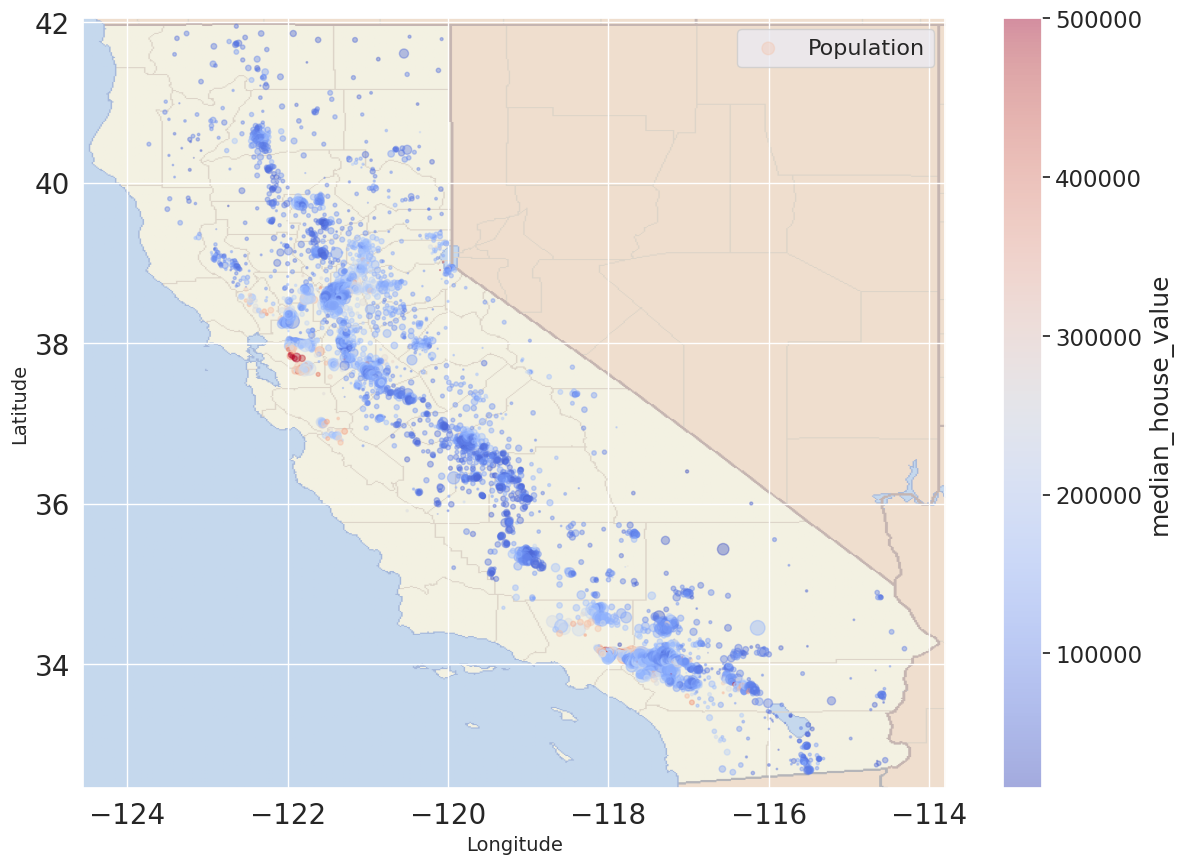

In [223]:
df_loc.plot(kind="scatter", x="longitude", y="latitude",
                       s=df_loc['population']/100, label="Population", figsize = (15, 10),
                       c="median_house_value", cmap="coolwarm",
                       colorbar=True, alpha=0.4, fontsize = 20, sharex = False
                      )
plt.imshow(california_ing, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

## `Advance EDA using seaborn `

In [224]:
pd.qcut(df['median_income'],q=[0,0.25,0.5,0.75,0.95,1])

,median_income
0,"(7.3, 15.0]"
1,"(7.3, 15.0]"
2,"(4.744, 7.3]"
3,"(4.744, 7.3]"
4,"(3.536, 4.744]"
...,...
20635,"(0.499, 2.564]"
20636,"(0.499, 2.564]"
20637,"(0.499, 2.564]"
20638,"(0.499, 2.564]"


In [225]:
df['Income_cat']=pd.qcut(df['median_income'],q=[0,0.25,0.5,0.75,0.95,1],labels=['Low','Below_avg','Above_avg','High','Very_high'])

In [226]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Rooms_per_households,population_per_households,bedrooms_per_households,Income_cat
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,NEAR BAY,6.98,3.00,1.00,Very_high
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,NEAR BAY,6.24,2.00,1.00,Very_high
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,NEAR BAY,8.29,3.00,1.00,High
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,NEAR BAY,5.82,3.00,1.00,High
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,NEAR BAY,6.28,2.00,1.00,Above_avg


In [227]:
df['Income_cat'].value_counts(normalize=True)*100

,proportion
Income_cat,
Low,25.00
Above_avg,25.00
Below_avg,25.00
High,19.99
Very_high,5.00


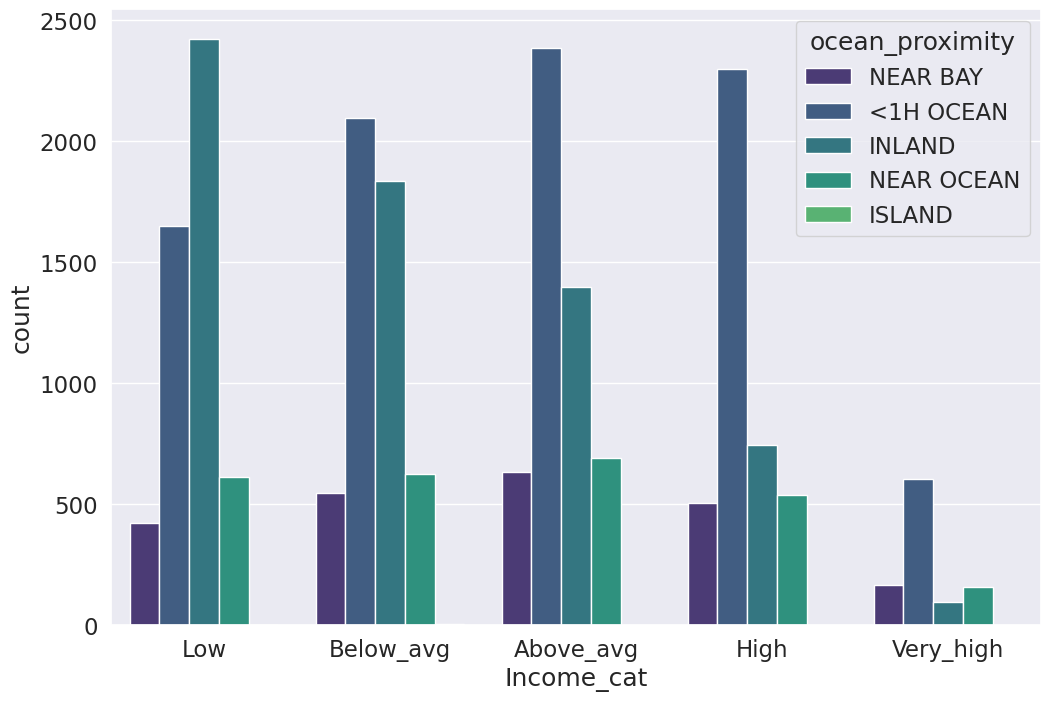

In [228]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5,palette='viridis')
sns.countplot(x=df['Income_cat'],hue=df['ocean_proximity'])
plt.show()

In [229]:
df[df['ocean_proximity']=='ISLAND']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Rooms_per_households,population_per_households,bedrooms_per_households,Income_cat
8314,-118.32,33.35,27.00,1675.00,521.00,744.00,331.00,2.16,450000.00,ISLAND,5.06,2.00,2.00,Low
8315,-118.33,33.34,52.00,2359.00,591.00,1100.00,431.00,2.83,414700.00,ISLAND,5.47,3.00,1.00,Below_avg
8316,-118.32,33.33,52.00,2127.00,512.00,733.00,288.00,3.39,300000.00,ISLAND,7.39,3.00,2.00,Below_avg
8317,-118.32,33.34,52.00,996.00,264.00,341.00,160.00,2.74,450000.00,ISLAND,6.22,2.00,2.00,Below_avg
8318,-118.48,33.43,29.00,716.00,214.00,422.00,173.00,2.60,287500.00,ISLAND,4.14,2.00,1.00,Below_avg


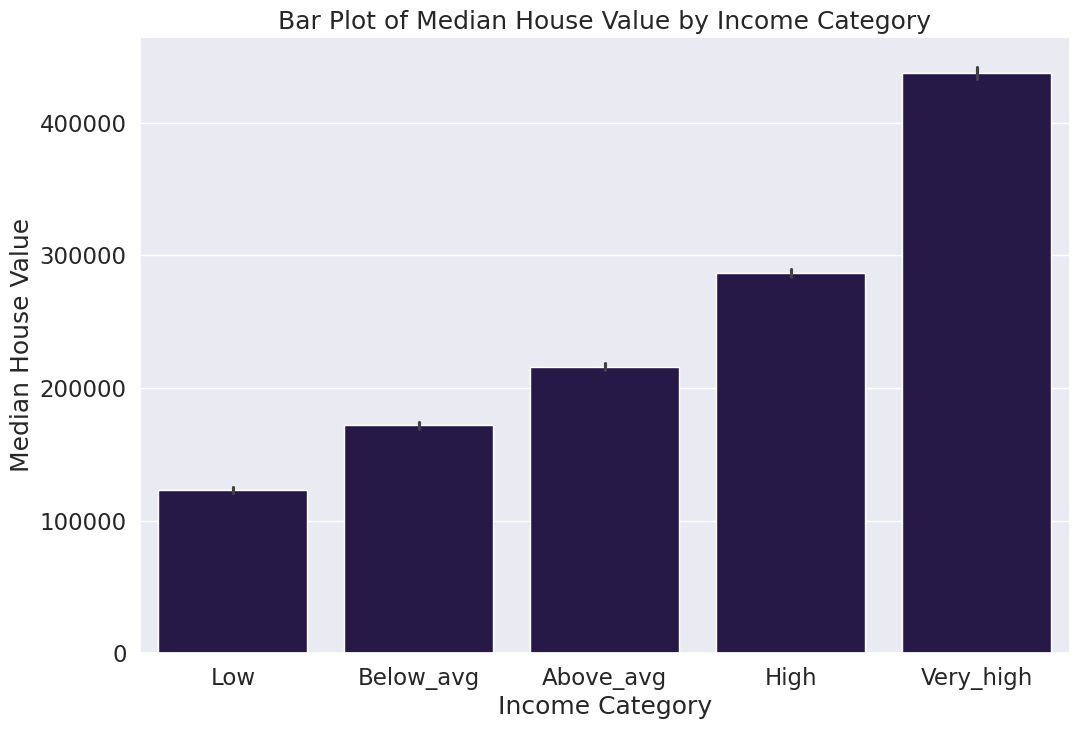

In [230]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5,palette='magma')
sns.barplot(x=df['Income_cat'],y=df['median_house_value'],dodge=True)
plt.title('Bar Plot of Median House Value by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Median House Value')
plt.show()

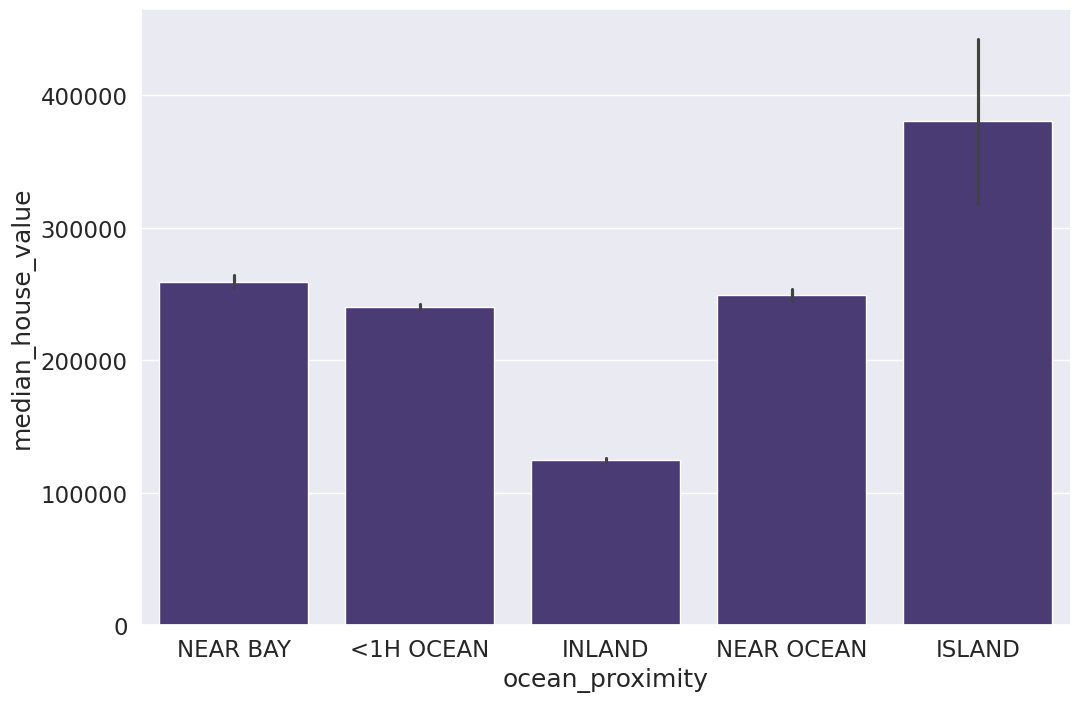

In [231]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5,palette='viridis')
sns.barplot(x=df['ocean_proximity'],y=df['median_house_value'],dodge=True)
plt.show()

In [232]:
import warnings
warnings.filterwarnings('ignore')
matrix=df.groupby(['Income_cat','ocean_proximity'])['median_house_value'].mean().unstack().drop(columns=['ISLAND'])

In [233]:
matrix.astype('int')

ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
Income_cat,,,,
Low,161337,84820,155122,148027
Below_avg,197236,115124,220196,208665
Above_avg,232278,147846,261965,255293
High,292208,208095,322566,337446
Very_high,439784,347571,451015,468739


<Axes: xlabel='ocean_proximity', ylabel='Income_cat'>

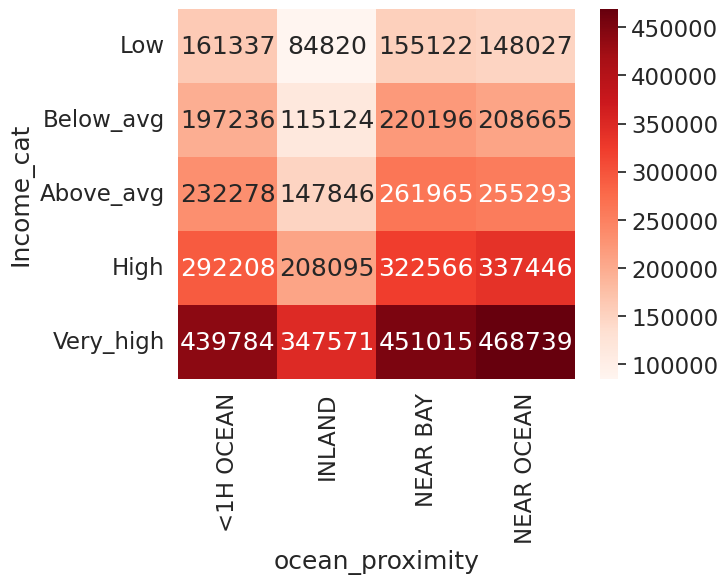

In [234]:
sns.heatmap(matrix.astype('int'),cmap='Reds',annot=True,fmt='d')

## ` Feature Engg Part-1`

In [235]:
label=df['median_house_value'].copy()
label

,median_house_value
0,452600.00
1,358500.00
2,352100.00
3,341300.00
4,342200.00
...,...
20635,78100.00
20636,77100.00
20637,92300.00
20638,84700.00


In [236]:
features=df.drop(columns=['median_house_value'])
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,Rooms_per_households,population_per_households,bedrooms_per_households,Income_cat
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,NEAR BAY,6.98,3.00,1.00,Very_high
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,NEAR BAY,6.24,2.00,1.00,Very_high
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,NEAR BAY,8.29,3.00,1.00,High
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,NEAR BAY,5.82,3.00,1.00,High
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,NEAR BAY,6.28,2.00,1.00,Above_avg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.00,1665.00,374.00,845.00,330.00,1.56,INLAND,5.05,3.00,1.00,Low
20636,-121.21,39.49,18.00,697.00,150.00,356.00,114.00,2.56,INLAND,6.11,3.00,1.00,Low
20637,-121.22,39.43,17.00,2254.00,485.00,1007.00,433.00,1.70,INLAND,5.21,2.00,1.00,Low
20638,-121.32,39.43,18.00,1860.00,409.00,741.00,349.00,1.87,INLAND,5.33,2.00,1.00,Low


In [237]:
features.select_dtypes('float')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Rooms_per_households,population_per_households,bedrooms_per_households
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,6.98,3.00,1.00
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,6.24,2.00,1.00
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,8.29,3.00,1.00
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,5.82,3.00,1.00
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,6.28,2.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.00,1665.00,374.00,845.00,330.00,1.56,5.05,3.00,1.00
20636,-121.21,39.49,18.00,697.00,150.00,356.00,114.00,2.56,6.11,3.00,1.00
20637,-121.22,39.43,17.00,2254.00,485.00,1007.00,433.00,1.70,5.21,2.00,1.00
20638,-121.32,39.43,18.00,1860.00,409.00,741.00,349.00,1.87,5.33,2.00,1.00


In [238]:
import scipy.stats as stats

In [239]:
pd.options.display.float_format='{:.2f}'.format
feature1=features.select_dtypes('float').apply(lambda x:stats.zscore(x))
feature1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Rooms_per_households,population_per_households,bedrooms_per_households
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.62,-0.01,-0.10
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.33,-0.10,-0.10
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.01,-0.10
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.01,-0.10
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.10,-0.10
...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.15,-0.01,-0.10
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,-0.01,-0.10
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.10,-0.10
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.10,-0.10


In [240]:
feature1.agg(['mean','std'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Rooms_per_households,population_per_households,bedrooms_per_households
mean,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## `Feature Engg Part-2`

In [241]:
features['ocean_proximity']

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [242]:
features['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


In [243]:
dummies=pd.get_dummies(df['ocean_proximity']).astype(int)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [244]:
features=pd.concat([feature1,dummies,df['Income_cat']],axis=1)
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Rooms_per_households,population_per_households,bedrooms_per_households,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,Income_cat
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.62,-0.01,-0.10,0,0,0,1,0,Very_high
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.33,-0.10,-0.10,0,0,0,1,0,Very_high
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.01,-0.10,0,0,0,1,0,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.01,-0.10,0,0,0,1,0,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.10,-0.10,0,0,0,1,0,Above_avg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.15,-0.01,-0.10,0,1,0,0,0,Low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,-0.01,-0.10,0,1,0,0,0,Low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.10,-0.10,0,1,0,0,0,Low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.10,-0.10,0,1,0,0,0,Low


## `Splitting Data into test and train set`

In [245]:
test_size=0.2

In [246]:
X_test=features.sample(frac=test_size,random_state=123)

In [247]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Rooms_per_households,population_per_households,bedrooms_per_households,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,Income_cat
14354,1.17,-1.35,-0.45,-0.10,0.27,-0.13,0.25,-0.39,-0.56,-0.10,-0.10,0,0,0,0,1,Below_avg
12908,-0.86,1.40,-0.37,0.11,-0.03,-0.12,-0.03,-0.29,0.18,-0.01,-0.10,0,1,0,0,0,Below_avg
19545,-0.70,0.93,0.82,-0.13,0.16,0.55,0.28,-1.14,-0.62,-0.01,-0.10,0,1,0,0,0,Low
12188,1.11,-0.91,-1.40,-0.64,-0.72,-0.74,-0.81,-0.40,0.42,-0.01,-0.10,1,0,0,0,0,Below_avg
14786,1.22,-1.43,-0.61,-0.41,-0.58,-0.39,-0.53,0.50,0.16,-0.01,-0.10,0,0,0,0,1,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10262,0.85,-0.82,-0.69,0.61,0.01,0.41,0.11,1.43,0.77,-0.01,-0.10,1,0,0,0,0,High
3614,0.58,-0.65,0.74,-0.98,-1.04,-0.90,-1.04,-0.39,-0.21,0.09,-0.10,1,0,0,0,0,Below_avg
19296,-1.62,1.30,0.90,-0.11,-0.27,-0.33,-0.19,0.01,0.09,-0.10,-0.10,1,0,0,0,0,Above_avg
5826,0.63,-0.68,1.86,-0.43,-0.62,-0.60,-0.62,0.49,0.43,-0.01,-0.10,1,0,0,0,0,High


In [248]:
X_test['Income_cat'].value_counts(normalize=True)

,proportion
Income_cat,
Above_avg,0.25
Below_avg,0.25
Low,0.25
High,0.20
Very_high,0.05


In [249]:
features['Income_cat'].value_counts(normalize=True)

,proportion
Income_cat,
Low,0.25
Above_avg,0.25
Below_avg,0.25
High,0.20
Very_high,0.05


In [250]:
X_test.index

Index([14354, 12908, 19545, 12188, 14786,  9941,  3179,  4650, 15550, 17190,
       ...
        3992, 10261, 10862, 10863, 13864, 10262,  3614, 19296,  5826, 15383],
      dtype='int64', length=4087)

In [251]:
X_train=features.loc[~features.index.isin(X_test.index)].copy()
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Rooms_per_households,population_per_households,bedrooms_per_households,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,Income_cat
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.62,-0.01,-0.10,0,0,0,1,0,Very_high
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.33,-0.10,-0.10,0,0,0,1,0,Very_high
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.01,-0.10,0,0,0,1,0,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.01,-0.10,0,0,0,1,0,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.10,-0.10,0,0,0,1,0,Above_avg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.15,-0.01,-0.10,0,1,0,0,0,Low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,-0.01,-0.10,0,1,0,0,0,Low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.10,-0.10,0,1,0,0,0,Low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.10,-0.10,0,1,0,0,0,Low


In [252]:
X_train['Income_cat'].value_counts(normalize=True)

,proportion
Income_cat,
Low,0.25
Below_avg,0.25
Above_avg,0.25
High,0.20
Very_high,0.05


In [253]:
X_train=X_train.sample(frac=1,random_state=123)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Rooms_per_households,population_per_households,bedrooms_per_households,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,Income_cat
9896,-1.34,1.24,-1.48,-0.76,-0.90,-0.83,-0.84,1.43,-0.02,-0.01,-0.10,0,0,0,1,0,High
6749,0.74,-0.71,1.06,-0.00,-0.03,0.06,0.06,0.04,-0.17,-0.01,-0.10,1,0,0,0,0,Above_avg
13825,1.21,-0.54,0.19,-1.09,-1.15,-1.09,-1.16,-0.92,-0.25,-0.01,-0.10,0,1,0,0,0,Low
2842,0.29,-0.11,0.59,-0.55,-0.63,-0.66,-0.63,-0.47,0.06,-0.01,-0.10,0,1,0,0,0,Below_avg
10112,0.81,-0.79,0.11,-0.48,-0.55,-0.51,-0.50,0.34,-0.11,-0.01,-0.10,1,0,0,0,0,Above_avg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15460,1.14,-1.16,-1.40,-0.04,-0.22,-0.42,-0.13,0.10,0.11,-0.10,-0.10,0,0,0,0,1,Above_avg
1689,-1.34,1.12,-1.88,0.55,0.59,0.55,0.57,0.62,-0.02,-0.01,-0.10,0,0,0,1,0,High
14698,1.24,-1.33,0.19,-0.28,-0.29,-0.49,-0.30,-0.36,-0.08,-0.10,-0.10,0,0,0,0,1,Below_avg
19870,0.11,0.33,-1.40,0.27,0.19,-0.07,0.17,-0.47,0.11,-0.10,-0.10,0,1,0,0,0,Below_avg


In [254]:
X_train.drop(columns='Income_cat',inplace=True)

In [255]:
X_test.drop(columns='Income_cat',inplace=True)

In [256]:
Y_train=label.loc[X_train.index]
Y_test=label.loc[X_test.index]

In [257]:
Y_train

,median_house_value
9896,218100.00
6749,257200.00
13825,64800.00
2842,73100.00
10112,241100.00
...,...
15460,87500.00
1689,184800.00
14698,177700.00
19870,132000.00


In [258]:
Y_test

,median_house_value
14354,101800.00
12908,213000.00
19545,58800.00
12188,111300.00
14786,174100.00
...,...
10262,272200.00
3614,175900.00
19296,215900.00
5826,326100.00


## `Training the ML Model (Random Forest Regressor)`

In [259]:
from sklearn.ensemble import RandomForestRegressor

In [261]:
forest_reg=RandomForestRegressor(random_state=42,n_estimators=500,max_features='sqrt',max_depth=75,min_samples_split=2)

In [262]:
forest_reg.fit(X_train,Y_train)

RandomForestRegressor(max_depth=75, max_features='sqrt', n_estimators=500,
                      random_state=42)

In [263]:
forest_reg.score(X_train,Y_train)

0.9754966274620985

In [264]:
from sklearn.metrics import mean_squared_error

In [265]:
pred=forest_reg.predict(X_train)
pred

array([234021.608, 248774.   ,  76256.198, ..., 181205.208, 120187.   ,
       185908.808])

In [268]:
forest_mse=mean_squared_error(Y_train,pred)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

18153.96195284504

##`Evaluating the model on the test set`

In [269]:
forest_reg.score(X_test,Y_test)

0.8218126721380234

In [270]:
pred=forest_reg.predict(X_test)
pred

array([228296.004, 124214.6  ,  70572.2  , ..., 227114.816, 335232.626,
       270184.202])

In [271]:
forest_mse=mean_squared_error(Y_test,pred)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

47798.42312411225

In [272]:
df1=pd.DataFrame(data={'True_v':Y_test,'Pred':pred})
df1

,True_v,Pred
14354,101800.00,228296.00
12908,213000.00,124214.60
19545,58800.00,70572.20
12188,111300.00,194788.61
14786,174100.00,166632.40
...,...,...
10262,272200.00,297862.61
3614,175900.00,176620.00
19296,215900.00,227114.82
5826,326100.00,335232.63


In [277]:
ab_sub=df1['True_v'].sub(df1['Pred']).abs()
ab_sub

,0
14354,126496.00
12908,88785.40
19545,11772.20
12188,83488.61
14786,7467.60
...,...
10262,25662.61
3614,720.00
19296,11214.82
5826,9132.63


In [279]:
mean_ab_sub=ab_sub.mean()
mean_ab_sub

32107.592056275997

## `Feature imp`

In [280]:
forest_reg.feature_importances_

array([1.00870714e-01, 9.19139114e-02, 4.57635805e-02, 3.18683895e-02,
       2.72086327e-02, 3.27444306e-02, 2.60600968e-02, 3.17243246e-01,
       9.28533217e-02, 5.85030613e-02, 3.35594152e-03, 2.10738949e-02,
       1.35127471e-01, 2.81935247e-04, 6.33462523e-03, 8.79674691e-03])

In [282]:
feature_imp=pd.Series(data=forest_reg.feature_importances_,index=X_train.columns)
feature_imp.sort_values(ascending=False)

,0
median_income,0.32
INLAND,0.14
longitude,0.10
Rooms_per_households,0.09
latitude,0.09
population_per_households,0.06
housing_median_age,0.05
population,0.03
total_rooms,0.03
total_bedrooms,0.03


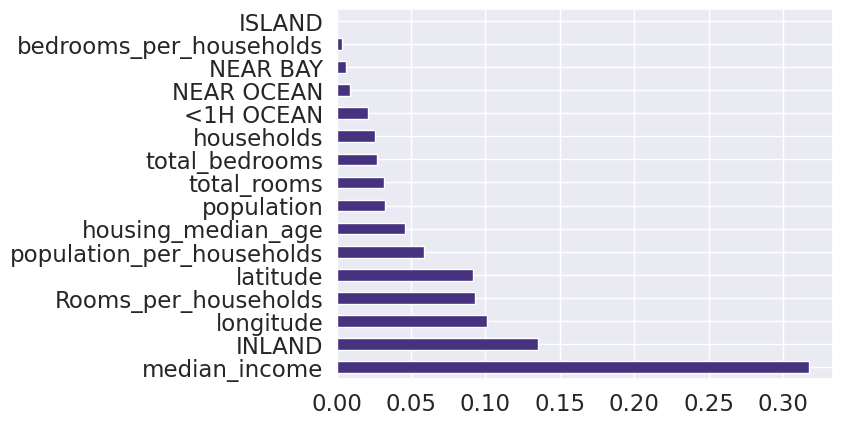

In [285]:
feature_imp.sort_values(ascending=False).plot.barh()
plt.show()